## An Introduction to PyMC3

In the Last post, I took a first-principles approach to computationally solving a Bayesian analysis problem. In practice, problems can be far more complex. Fortunately, sophisticated software libraries already exist. We can leverage that to solve equally tricky problems. While several options are available, my current favourite is [PyMC3](https://docs.pymc.io/). 

If you want to be inspired by what's possible, I strongly suggest checking out the fantastic set of [examples](https://docs.pymc.io/nb_examples/index.html) on the PyMC3 site.
 

## Putting it into practice
Let's start as we did last time, by taking a sample of the first 10 elements from the blacklist.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]

# E: the data
y = np.array([52, 145, 84, 161, 85, 152,
       47, 109, 16, 16, 106, 101,
       64, 73, 57, 83, 88, 135,
       119,120,121, 122, 42, 8, 8, 104, 112,
       89, 82, 74, 114, 22, 12,
       21, 21, 67, 71, 93, 94,
       75, 7, 97, 117, 62, 87,
       55, 11, 38, 80, 72, 43,
       50, 86, 31, 108, 24, 24,
       95, 132, 103, 77, 113, 78,
       32, 32, 41, 18, 14, 14,
       79, 66, 65, 81, 105, 53,
       98, 98, 111, 163, 102,
       34, 107, 59, 10, 61, 29,
       46, 4, 4, 30, 37, 76, 44,
       54, 90, 48, 13, 118, 100,
       56, 63, 51, 68, 19, 25,
       23, 13, 110, 26, 17, 33,
       20, 124, 146, 147, 131, 91, 116,
       58, 99, 160, 20, 20, 9,
        6, 115, 69, 136, 92, 128,
       60, 15, 27, 27, 151, 138,
       130, 125, 162, 159, 3, 137,
       155, 144, 126, 158, 149,
       150])

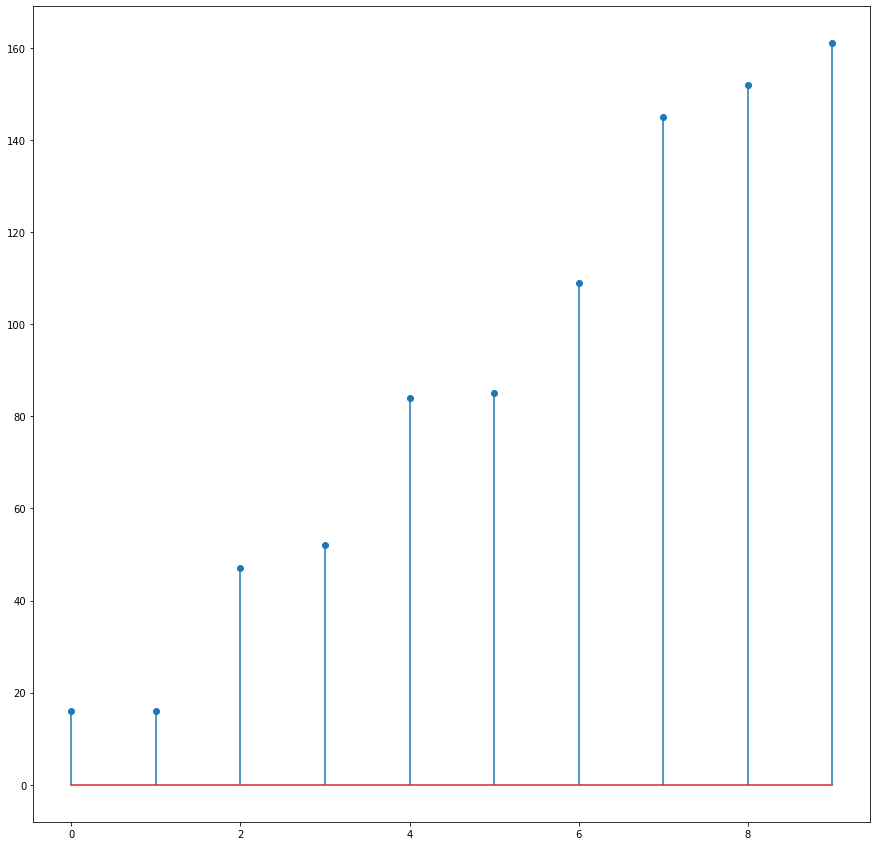

In [2]:
y_sample = y[0:10]
plt.stem(np.sort(y_sample), use_line_collection=True)
plt.show()

Now, this is when things start getting interesting. Firstly I will lay out all the code we need to solve this problem, all seven lines.

Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [N]
Sampling 2 chains, 0 divergences: 100%|██████████| 21000/21000 [00:05<00:00, 4179.11draws/s]
The number of effective samples is smaller than 10% for some parameters.


array([<AxesSubplot:title={'center':'N'}>], dtype=object)

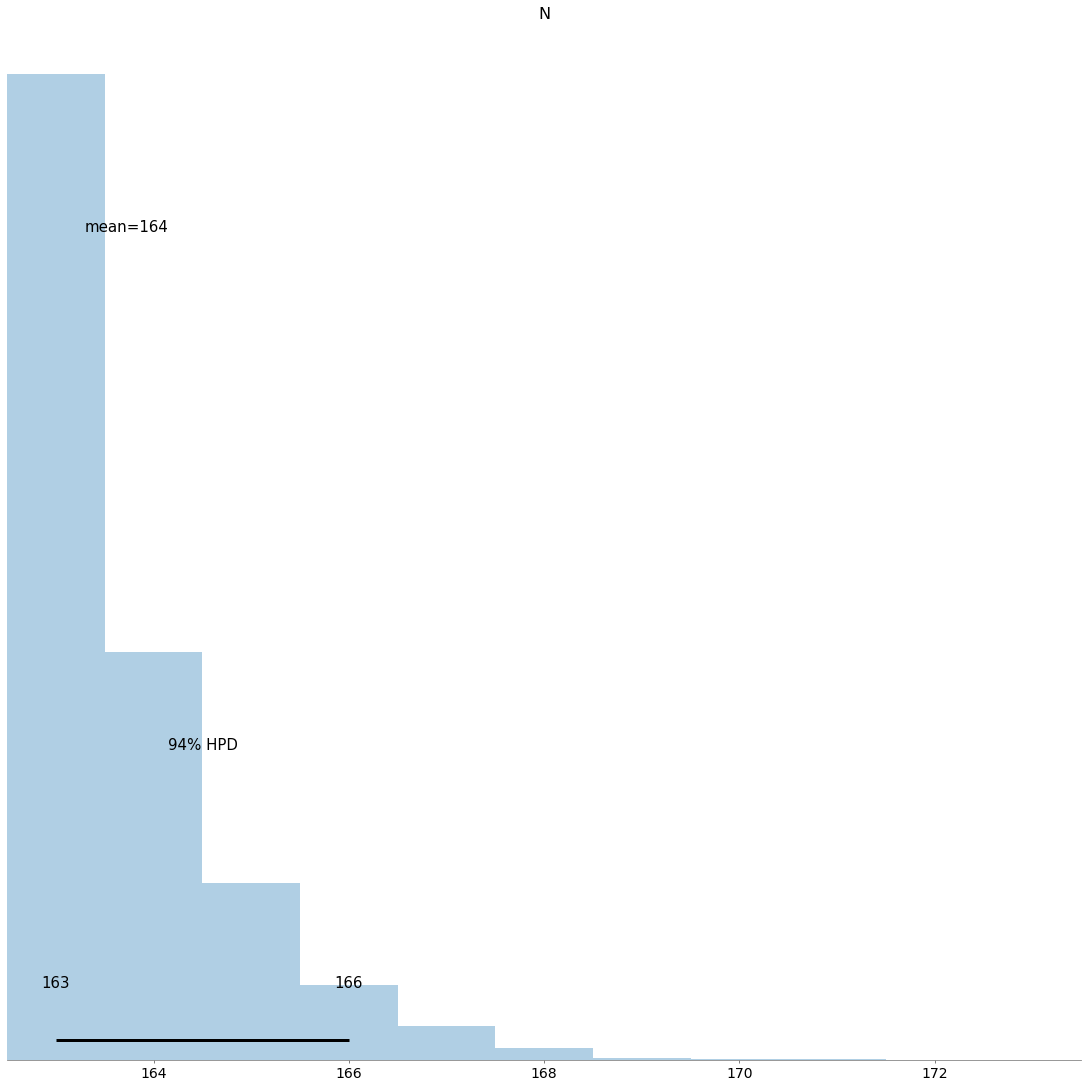

In [3]:
import pymc3 as pm

model = pm.Model()
with model:
    # prior - P(N): N ~ uniform(max(y), 500)
    N = pm.DiscreteUniform("N", lower=y.max(), upper=500)

    # likelihood - P(D|N): y ~ uniform(0, N)
    y_obs = pm.DiscreteUniform("y_obs", lower=0, upper=N, observed=y)
    
    trace = pm.sample(10_000, start={"N": y.max()}) 

pm.plots.plot_posterior(trace)

Ok, we are 94% confident the answer (the length of the Blacklist) is in the range from 163 to 166. 


## Line by Line.
Let's step through now line by line, to understand what's going on.

1. Import PyMC3.
```python
import pymc3 as pm
```

2. Create a PyMC3 model.
```python
model = pm.Model()
```

3. Create a context manager so that that magic can happen [behind the scenes](https://book.pythontips.com/en/latest/context_managers.html)
```python
with model:
```

4. Create a distribution for $N$, our prior belief of the length of the Blacklist ($P(H)$). In layman's terms, we say that $N$ is equally likely to any integer between the highest index we observe in our sample of data, 500. The number 500 is arbitrary; ultimately, the data we observe will "wash out" any assumptions we have made. 

```python
N = pm.DiscreteUniform("N", lower=y.max(), upper=500)
```

5. Create our likelihood function, $P(E|H)$. Given the data we have observed, how likely is any value of N? Again, we are using a discrete uniform distribution to model the probability of seeing any observed data point.

```python
y_obs = pm.DiscreteUniform("y_obs", lower=0, upper=N, observed=y)
```

6. Sample the model. We are computationally finding $P(H|E)$. This is where the real magic occurs. In this case, we generate 10,000 samples and store them in 'trace'. 

```python
trace = pm.sample(10_000, start={"N": y.max()}) 
```

7. Plot the distribution of the parameters. This is our posterior, ($P(H|E)$).
```python
pm.plots.plot_posterior(trace)
```


## Conclusion
In conclusion, PyMC3 can be used to quickly and efficiently conduct Bayesian analysis. I hope to do more examples in future posts, looking at other 'real world' problems.